**Импорт всех необходимых библиотек**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

- age: continuous. Возраст людей
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. Рабочий класс и категории, которыми он представлен
- fnlwgt: continuous. Примерная оценка количества людей, которое представляет каждая строка данных
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Образование и категории, которыми оно представлено
- education-num: continuous. Образование и категории в числовом выражении, которыми оно представлено. По сути, дубль предыдущего столбца
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. Семейное положение и категории, которыми оно описывается
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. Занятость и ее виды
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. Отношения в семье, либо их отсутствие
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Раса и ее типы
- sex: Female, Male. Пол
- capital-gain: continuous. Прирост капитала
- capital-loss: continuous. Потеря капитала
- hours-per-week: continuous. Количество рабочих часов в неделю
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. Родная страна. Страна происхождения
- salary: >50K,<=50K. Зарплата в выражении двух классов: до 50 тысяч в год включительно или больше 50 тысяч в год. В долларах

## 1.2 Загрузка данных общее описание набора данных
* Первый взгляд на данные: head(), tail(), sample()
* Размер набора данных
* Баланс классов в целевом признаке при классфикации. Диапазон данных и базовые статистические метрики целевого признака при регерессии
* Базовые статистики по числовым данным
* Базовые статистики по строковым данным
* Наличие пропусков в данных

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/aksenov7/Kaggle_competition_group/master/adult.data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

Видим наличие достаточно сильного дисбаланса классов

In [ ]:
df.salary.value_counts(normalize=True)

<=50K    0.7592
>50K     0.2408
Name: salary, dtype: float64

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.0000,3.2561e+04,32561.0000,32561.0000,32561.0000,32561.0000
mean,38.5816,1.8978e+05,10.0807,1077.6488,87.3038,40.4375
std,13.6404,1.0555e+05,2.5727,7385.2921,402.9602,12.3474
min,17.0000,1.2285e+04,1.0000,0.0000,0.0000,1.0000
25%,28.0000,1.1783e+05,9.0000,0.0000,0.0000,40.0000
50%,37.0000,1.7836e+05,10.0000,0.0000,0.0000,40.0000
75%,48.0000,2.3705e+05,12.0000,0.0000,0.0000,45.0000
max,90.0000,1.4847e+06,16.0000,99999.0000,4356.0000,99.0000


**Первичные выводы**
* Возраст людей в выборке от 17 до 90 лет. Но примерно 68% записей лежит в диапазоне 25 - 52 года.
* Информация в каждой строке подкреплена выборкой от 12 тысяч до 1.5 миллионов. В среднем примерно 189 тысячами людей
* Номер образования не очень информативен. Проще будет посмотреть на названия типов образования. Пока лишь можно сказать, что насчитывается 16 типов образования и самый полпулярный видимо 10-й. И что 9 типов образования распределены по 25% записей, 10-й тип покрывает полностью еще 25%, 11 и 12-й тип покрывают следующие 25% записей, а типы с 13-го по 16-й приходятся на полследнюю четверть записей
* Прирост капитала явление достаточно редкое и у 75% записей таблицы его нет вообще. И только в последней четверти (в 4-м квартиле) наблюдаются записи про прирост капитала в диапазоне от 0 до практически 100 тысяч, но в среднем все же 1 тысяча, а в диапазон от 0 до 8 тысяч вероятно попадает 68% всех записей из этой последней четверти записей.
* Убыль капитала представлена примерно тем же положением. Видимо тем, у кого нет прироста и убывать нечему, поэтому видим те же 75% по нулям и в последнем квартиле распределение потерь от 0 до 4 тысяч, со средним 87 долларов, что явно сильно меньше среднего прироста в 1 тысяча долларов
* Количество рабочих часов в неделю распределено от 1 до 99, но среднее все же 40. А диапазон 28 - 52 часа покрывает вероятно 68% записей таблицы

In [ ]:
df.describe(include=(object))

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


* Рабочий класс содержит 9 типов классов и самым распространенным является Private. 22 тысячи из 32
* Возвращаясь к образованию. Наиболее распространенное образование HS-grad и оно представленно даже не 25%, как мы могли предположить из предыдущей таблицы, а практически 34%
* Наиболее распространенное семейное положение Married-civ-spouse (гражданский брак) практически у 50% всей таблицы
* Занятость чаще всего представлена Prof-speciality в количестве 4 тысячи, то есть более 10%
* Отношения в семье. Почти 50% Husband (муж)
* Подавляющее большинство представителей выборки - это белые люди. Практически 28 тысяч из 32-х. Более 90%
* В выборке преобладают мужчины их практически 22 тысячи, или около 66%
* Страна происхождения США у 29 тысяч из 32, что составляет примерно 90%
* зарплату рассматривали выше, но оставим и тут. 24,7 тысяч или 75% выборки - это люди получающие до 50 тысяч включительно

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Пропусков в данных не обнаружено

## 1.3 Визуальный и статистический анализ данных

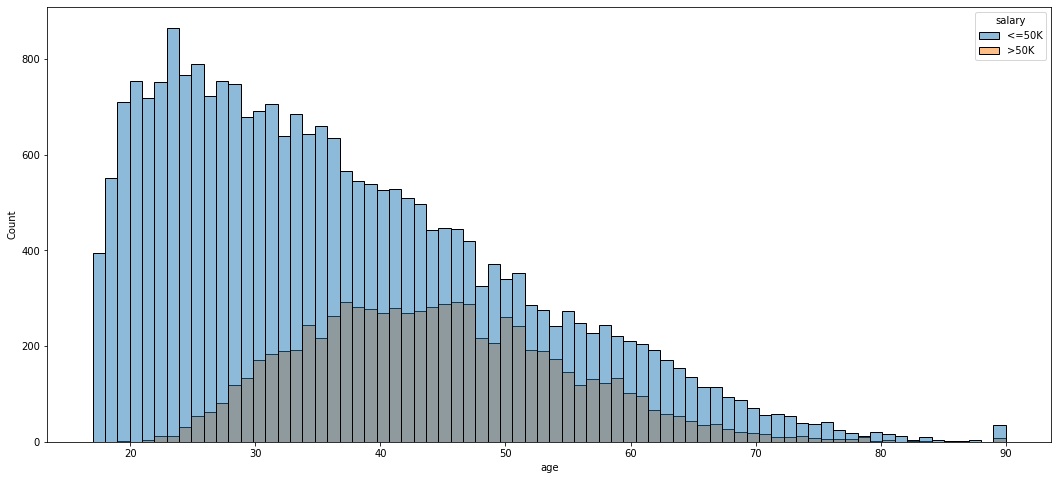

In [ ]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="age", hue="salary", bins=74)

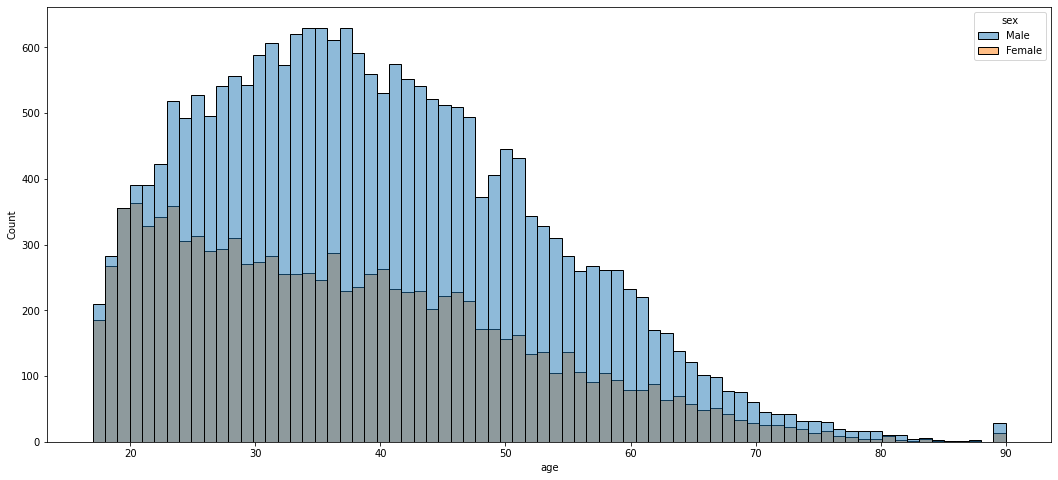

In [ ]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="age", hue="sex", bins=74)

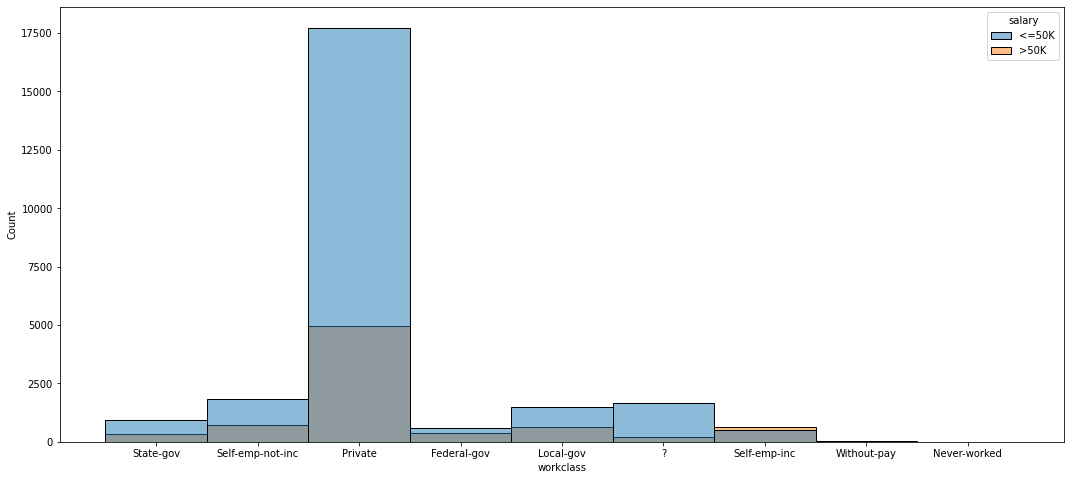

In [ ]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="workclass", hue="salary", bins=74)

# 2. Заполнение пропусков и обработка выбросов в данных

## Пропуски в данных

Не дискретные данные.

In [ ]:
df.age.fillna(df.age.median())#df.age = df.age.fillna(df.age.median())

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64

Если дискретные данные

In [ ]:
df.education.mode()

0    HS-grad
dtype: object

In [ ]:
df.education.fillna(df.education.mode()[0])

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

## Выбросы

In [ ]:
df.select_dtypes(include=["int", "float"])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [ ]:
df.select_dtypes(include=["int", "float"]).describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.0000,3.2561e+04,32561.0000,32561.0000,32561.0000,32561.0000
mean,38.5816,1.8978e+05,10.0807,1077.6488,87.3038,40.4375
std,13.6404,1.0555e+05,2.5727,7385.2921,402.9602,12.3474
min,17.0000,1.2285e+04,1.0000,0.0000,0.0000,1.0000
25%,28.0000,1.1783e+05,9.0000,0.0000,0.0000,40.0000
50%,37.0000,1.7836e+05,10.0000,0.0000,0.0000,40.0000
75%,48.0000,2.3705e+05,12.0000,0.0000,0.0000,45.0000
max,90.0000,1.4847e+06,16.0000,99999.0000,4356.0000,99.0000


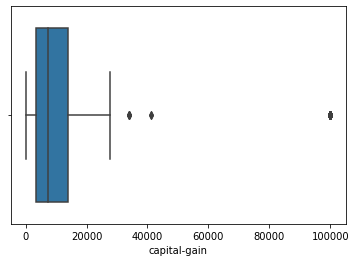

In [ ]:
sns.boxplot(x=df[df["capital-gain"] > 0]["capital-gain"])

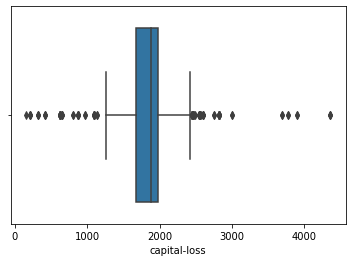

In [ ]:
sns.boxplot(x=df[df["capital-loss"] > 0]["capital-loss"])

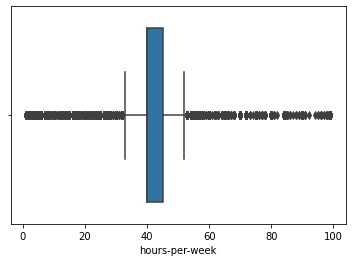

In [ ]:
sns.boxplot(x=df["hours-per-week"])

# 3. Преобразование признаков

Скопируем наш набор данных до преобразований

In [ ]:
dt = df.copy()
dt.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
28454,46,Private,98637,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,50,United-States,>50K
8037,51,Private,243361,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,<=50K
6511,32,Private,136935,HS-grad,9,Never-married,Other-service,Unmarried,Black,Female,0,0,13,United-States,<=50K


## 3.1. Начнем с workclass

Из графика мы помним, что распределение бедных и богатых внутри категорий рабочих классов неоднородно. Давайте отсортируем рабочие классы по убыванию или возрастанию процента бедных/богатых в них

In [ ]:
pd.get_dummies(data=df, columns=["workclass"])

,age,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,salary,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,<=50K,0,0,0,0,0,0,0,1,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,<=50K,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,<=50K,0,0,0,0,1,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,<=50K,0,0,0,0,1,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,<=50K,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,<=50K,0,0,0,0,1,0,0,0,0
32557,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,>50K,0,0,0,0,1,0,0,0,0
32558,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,<=50K,0,0,0,0,1,0,0,0,0
32559,22,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,...,<=50K,0,0,0,0,1,0,0,0,0


In [ ]:
gdf = dt.groupby("workclass").salary.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"salary":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.salary == "<=50K"].sort_values("rate", ascending=True)
gdf = gdf[gdf.salary == ">50K"].sort_values("rate", ascending=False)
gdf

,workclass,salary,rate
9,Self-emp-inc,>50K,0.5573
3,Federal-gov,>50K,0.3865
5,Local-gov,>50K,0.2948
12,Self-emp-not-inc,>50K,0.2849
14,State-gov,>50K,0.2720
8,Private,>50K,0.2187
1,?,>50K,0.1040


In [ ]:
gdf_

,workclass,salary,rate
10,Self-emp-inc,<=50K,0.4427
2,Federal-gov,<=50K,0.6135
4,Local-gov,<=50K,0.7052
11,Self-emp-not-inc,<=50K,0.7151
13,State-gov,<=50K,0.7280
7,Private,<=50K,0.7813
0,?,<=50K,0.8960
6,Never-worked,<=50K,1.0000
15,Without-pay,<=50K,1.0000


In [ ]:
gdf_[~gdf_.workclass.isin(gdf.workclass.values)]

,workclass,salary,rate
6,Never-worked,<=50K,1.0
15,Without-pay,<=50K,1.0


In [ ]:
class_ = gdf_[~gdf_.workclass.isin(gdf.workclass.values)].workclass.values
workclass_mapper = {k:v for v, k in enumerate(np.hstack((gdf.workclass.values, class_)))}
workclass_mapper

{'?': 6,
 'Federal-gov': 1,
 'Local-gov': 2,
 'Never-worked': 7,
 'Private': 5,
 'Self-emp-inc': 0,
 'Self-emp-not-inc': 3,
 'State-gov': 4,
 'Without-pay': 8}

In [ ]:
dt.workclass = dt.workclass.map(workclass_mapper)
dt.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
22550,44,5,171722,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,0,39,United-States,<=50K


## 3.2 Давайте применим ту же логику к **education**. Возможно существующая нумерация, которая в education-num не столь информативна

In [ ]:
gdf = dt.groupby("education").salary.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"salary":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.salary == "<=50K"].sort_values("rate", ascending=True)
gdf = gdf[gdf.salary == ">50K"].sort_values("rate", ascending=False)
gdf

,education,salary,rate
20,Doctorate,>50K,0.7409
27,Prof-school,>50K,0.7344
24,Masters,>50K,0.5566
19,Bachelors,>50K,0.4148
17,Assoc-voc,>50K,0.2612
15,Assoc-acdm,>50K,0.2484
30,Some-college,>50K,0.1902
23,HS-grad,>50K,0.1595
5,12th,>50K,0.0762
1,10th,>50K,0.0665


In [ ]:
gdf_[~gdf_.education.isin(gdf.education.values)]

,education,salary,rate
26,Preschool,<=50K,1.0


In [ ]:
class_ = gdf_[~gdf_.education.isin(gdf.education.values)].education.values
education_mapper = {k:v for v, k in enumerate(np.hstack((gdf.education.values, class_)))}
dt.education = dt.education.map(education_mapper)
dt.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
710,28,5,296450,3,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


Выдвенем гипотезу, что `education-num`может скорее вносить шум, чем помогать классификации, но пока удалять не будет. Решение нужно будет обосновать

## 3.3 Разберем `marital-status`

In [ ]:
gdf = dt.groupby("marital-status").salary.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"salary":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.salary == "<=50K"].sort_values("rate", ascending=True)
gdf = gdf[gdf.salary == ">50K"].sort_values("rate", ascending=False)
gdf

,marital-status,salary,rate
5,Married-civ-spouse,>50K,0.4468
3,Married-AF-spouse,>50K,0.4348
1,Divorced,>50K,0.1042
13,Widowed,>50K,0.0856
7,Married-spouse-absent,>50K,0.0813
11,Separated,>50K,0.0644
9,Never-married,>50K,0.0460


In [ ]:
gdf_[~gdf_["marital-status"].isin(gdf["marital-status"].values)]

,marital-status,salary,rate


In [ ]:
marital_mapper = {k:v for v, k in enumerate(gdf["marital-status"].values)}
dt["marital-status"] = dt["marital-status"].map(marital_mapper)
dt.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
4644,35,2,185769,6,10,0,Other-service,Husband,White,Male,0,0,40,United-States,<=50K


## 3.4. `occupaiton`

In [ ]:
gdf = dt.groupby("occupation").salary.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"salary":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.salary == "<=50K"].sort_values("rate", ascending=True)
gdf = gdf[gdf.salary == ">50K"].sort_values("rate", ascending=False)
gdf

,occupation,salary,rate
9,Exec-managerial,>50K,0.4840
21,Prof-specialty,>50K,0.4490
23,Protective-serv,>50K,0.3251
27,Tech-support,>50K,0.3050
25,Sales,>50K,0.2693
7,Craft-repair,>50K,0.2266
29,Transport-moving,>50K,0.2004
3,Adm-clerical,>50K,0.1345
15,Machine-op-inspct,>50K,0.1249
11,Farming-fishing,>50K,0.1157


In [ ]:
gdf_[~gdf_.occupation.isin(gdf.occupation.values)]

,occupation,salary,rate


In [ ]:
occupation_mapper = {k:v for v, k in enumerate(gdf.occupation.values)}
dt.occupation = dt.occupation.map(occupation_mapper)
dt.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12602,38,5,409604,3,13,0,0,Husband,White,Male,15024,0,40,United-States,>50K


## 3.5 `relationship`

In [ ]:
gdf = dt.groupby("relationship").salary.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"salary":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.salary == "<=50K"].sort_values("rate", ascending=True)
gdf = gdf[gdf.salary == ">50K"].sort_values("rate", ascending=False)
gdf

,relationship,salary,rate
11,Wife,>50K,0.4751
1,Husband,>50K,0.4486
3,Not-in-family,>50K,0.1031
9,Unmarried,>50K,0.0633
5,Other-relative,>50K,0.0377
7,Own-child,>50K,0.0132


In [ ]:
gdf_[~gdf_.relationship.isin(gdf.relationship.values)]

,relationship,salary,rate


In [ ]:
relationship_mapper = {k:v for v, k in enumerate(gdf.relationship.values)}
dt.relationship = dt.relationship.map(relationship_mapper)
dt.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
17515,41,5,223763,7,9,2,5,2,White,Male,0,0,40,United-States,<=50K


## 3.6 `race`

In [ ]:
gdf = dt.groupby("race").salary.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"salary":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.salary == "<=50K"].sort_values("rate", ascending=True)
gdf = gdf[gdf.salary == ">50K"].sort_values("rate", ascending=False)
gdf

,race,salary,rate
3,Asian-Pac-Islander,>50K,0.2656
9,White,>50K,0.2559
5,Black,>50K,0.1239
1,Amer-Indian-Eskimo,>50K,0.1158
7,Other,>50K,0.0923


In [ ]:
gdf_[~gdf_.race.isin(gdf.race.values)]

,race,salary,rate


In [ ]:
race_mapper = {k:v for v, k in enumerate(gdf.race.values)}
dt.race = dt.race.map(race_mapper)
dt.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2461,26,3,284343,5,12,6,5,2,1,Male,0,0,40,United-States,<=50K


## 3.7 `sex`

In [ ]:
gdf = dt.groupby("sex").salary.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"salary":"rate"}, inplace=False).reset_index()
gdf = gdf[gdf.salary == ">50K"].sort_values("rate", ascending=False)
gdf

,sex,salary,rate
3,Male,>50K,0.3057
1,Female,>50K,0.1095


Но в целом в данной ситуации неважна последовательность, так как класса всего два, то их всегда можно переставить местами и просто поменяется направление их влияния на целевую метку. Поэтому тут применим немного другой метод преобразования, который может вам понадобиться при преобразовании категорий, в которых нет зависимости от последовательности.

In [ ]:
pd.get_dummies(dt, columns=["sex"]).head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary,sex_Female,sex_Male
0,39,4,77516,3,13,6,7,2,1,2174,0,40,United-States,<=50K,0,1
1,50,3,83311,3,13,0,0,1,1,0,0,13,United-States,<=50K,0,1
2,38,5,215646,7,9,2,12,2,1,0,0,40,United-States,<=50K,0,1
3,53,5,234721,12,7,0,12,1,2,0,0,40,United-States,<=50K,0,1
4,28,5,338409,3,13,0,1,0,2,0,0,40,Cuba,<=50K,1,0


В данной ситуации, когда класса всего два может использовать подход с отбрасыванием одного из столбцов, так как понятно же, что если не мужчина, то женщина



In [ ]:
pd.get_dummies(dt, columns=["sex"], drop_first=True).head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary,sex_Male
0,39,4,77516,3,13,6,7,2,1,2174,0,40,United-States,<=50K,1
1,50,3,83311,3,13,0,0,1,1,0,0,13,United-States,<=50K,1
2,38,5,215646,7,9,2,12,2,1,0,0,40,United-States,<=50K,1
3,53,5,234721,12,7,0,12,1,2,0,0,40,United-States,<=50K,1
4,28,5,338409,3,13,0,1,0,2,0,0,40,Cuba,<=50K,0


In [ ]:
dt = pd.get_dummies(dt, columns=["sex"], drop_first=True)
dt.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary,sex_Male
27844,61,6,175032,7,9,0,11,1,1,0,0,40,United-States,<=50K,1
12349,34,5,176244,10,4,0,13,0,1,0,0,40,United-States,<=50K,0
29532,17,5,184924,11,5,6,12,5,1,0,1719,15,United-States,<=50K,1


## 3.8. `native-country`

In [ ]:
gdf = dt.groupby("native-country").salary.value_counts(normalize=True).to_frame()
gdf = gdf.rename(columns={"salary":"rate"}, inplace=False).reset_index()
gdf_ = gdf[gdf.salary == "<=50K"].sort_values("rate", ascending=True)
gdf = gdf[gdf.salary == ">50K"].sort_values("rate", ascending=False)
gdf

,native-country,salary,rate
40,Iran,>50K,0.4186
21,France,>50K,0.4138
38,India,>50K,0.4000
71,Taiwan,>50K,0.3922
48,Japan,>50K,0.3871
...,...,...,...
54,Nicaragua,>50K,0.0588
52,Mexico,>50K,0.0513
27,Guatemala,>50K,0.0469
9,Columbia,>50K,0.0339


In [ ]:
gdf_[~gdf_["native-country"].isin(gdf["native-country"].values)]

,native-country,salary,rate
55,Outlying-US(Guam-USVI-etc),<=50K,1.0
30,Holand-Netherlands,<=50K,1.0


In [ ]:
class_ = gdf_[~gdf_["native-country"].isin(gdf["native-country"].values)]["native-country"].values
native_mapper = {k:v for v, k in enumerate(np.hstack((gdf["native-country"].values, class_)))}
dt["native-country"] = dt["native-country"].map(native_mapper)
dt.sample()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary,sex_Male
4104,30,0,68330,6,10,0,4,1,1,0,0,50,18,<=50K,1


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  int64 
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  int64 
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  int64 
 6   occupation      32561 non-null  int64 
 7   relationship    32561 non-null  int64 
 8   race            32561 non-null  int64 
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  int64 
 13  salary          32561 non-null  object
 14  sex_Male        32561 non-null  uint8 
dtypes: int64(13), object(1), uint8(1)
memory usage: 3.5+ MB


In [ ]:
dt[dt.workclass.isna()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary,sex_Male


## 3.9 Шкалирование данных

In [ ]:
sc = StandardScaler()
X_ = sc.fit_transform(dt.select_dtypes(exclude=(object)))
X_

array([[ 0.03067056, -0.27313371, -1.06361075, ..., -0.03542945,
        -0.08509241,  0.70307135],
       [ 0.83710898, -0.99185899, -1.008707  , ..., -2.22215312,
        -0.08509241,  0.70307135],
       [-0.04264203,  0.44559157,  0.2450785 , ..., -0.03542945,
        -0.08509241,  0.70307135],
       ...,
       [ 1.42360965,  0.44559157, -0.35877741, ..., -0.03542945,
        -0.08509241, -1.42233076],
       [-1.21564337,  0.44559157,  0.11095988, ..., -1.65522476,
        -0.08509241,  0.70307135],
       [ 0.98373415, -3.14803482,  0.92989258, ..., -0.03542945,
        -0.08509241, -1.42233076]])

In [ ]:
rs = RobustScaler()
Xr = rs.fit_transform(dt.select_dtypes(exclude=(object)))
Xr

array([[ 0.1       , -1.        , -0.84580286, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.65      , -2.        , -0.79719687, ..., -5.4       ,
         0.        ,  0.        ],
       [ 0.05      ,  0.        ,  0.3127726 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.05      ,  0.        , -0.22181775, ...,  0.        ,
         0.        , -1.        ],
       [-0.75      ,  0.        ,  0.19403811, ..., -4.        ,
         0.        ,  0.        ],
       [ 0.75      , -5.        ,  0.91903476, ...,  0.        ,
         0.        , -1.        ]])

# 4. Baseline решение

## 4.1. Решение без преобразования признаков. На тех столбцах,которые можно использовать исходно

Разделение набора данных на матрицу признаков `X` и целевой признак `y`

In [ ]:
X = df.select_dtypes(include=(int, float))
y = df.salary

In [ ]:
X

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


Разделение набора данных на тренировочный и тестовый наборы

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 6), (6513, 6), (26048,), (6513,))

Проверяем, что баланс классов в тренировочном и тестовом наборах совпадают с исходным баласном

In [ ]:
y_train.value_counts(normalize=True)

<=50K    0.7592
>50K     0.2408
Name: salary, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

<=50K    0.7593
>50K     0.2407
Name: salary, dtype: float64

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.7973740786240786

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [ ]:
logreg.score(X_test, y_test)

0.7994779671426377

Так как качество модели на тестовых данных не уменьшилось, то можно сказать, что модель не переобучилась и обрела достаточно хорошую обощающую способность.

Но качество 79% не идеально! Давайте попробуем улучшить

## 4.2. Решение c преобразованиtv признаков. Но без шкалирования признаков

Разделение набора данных на матрицу признаков `X` и целевой признак `y`

In [ ]:
X = dt.select_dtypes(exclude=(object))
y = dt.salary

In [ ]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,sex_Male
0,39,4,77516,3,13,6,7,2,1,2174,0,40,18,1
1,50,3,83311,3,13,0,0,1,1,0,0,13,18,1
2,38,5,215646,7,9,2,12,2,1,0,0,40,18,1
3,53,5,234721,12,7,0,12,1,2,0,0,40,18,1
4,28,5,338409,3,13,0,1,0,2,0,0,40,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,5,257302,5,12,0,3,0,1,0,0,38,18,0
32557,40,5,154374,7,9,0,8,1,1,0,0,40,18,1
32558,58,5,151910,7,9,3,7,3,1,0,0,40,18,0
32559,22,5,201490,7,9,6,7,5,1,0,0,20,18,1


Разделение набора данных на тренировочный и тестовый наборы

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

Проверяем, что баланс классов в тренировочном и тестовом наборах совпадают с исходным баласном

In [ ]:
y_train.value_counts(normalize=True)

<=50K    0.7592
>50K     0.2408
Name: salary, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

<=50K    0.7593
>50K     0.2407
Name: salary, dtype: float64

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8231726044226044

Видим `ConvergenceWarning`, который говорит о том, что были проблемы при схождении алгоритма. Эта проблема у логистической регрессии возникает, если данные имеют слишком разную размерность. Необходимо шкалировать набор данных

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [ ]:
logreg.score(X_test, y_test)

0.8254260709350529

## 4.3. Шкалированные данные

### StandartScaller

Разделение набора данных на тренировочный и тестовый наборы

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

Проверяем, что баланс классов в тренировочном и тестовом наборах совпадают с исходным баласном

In [ ]:
y_train.value_counts(normalize=True)

<=50K    0.7592
>50K     0.2408
Name: salary, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

<=50K    0.7593
>50K     0.2407
Name: salary, dtype: float64

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.8483568796068796

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [ ]:
best_score = logreg.score(X_test, y_test)
best_score

0.8545984953170582

### RobustScaller

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

Создаем, обучаем и проверяем модель на тренировочном наборе данных

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8430205773955773

Оцениваем качество модели на тестовом наборе, который модель не видела при обучении

In [ ]:
logreg.score(X_test, y_test)

0.8475356978350991

# 5. POST анализ модели

In [ ]:
predict = logreg.predict(X_test)
predict

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [ ]:
features_name = dt.select_dtypes(exclude=["object"]).columns
print(f"Параметр b0: {logreg.intercept_}")
print(f"Значениея остальных параметров бетта:")
coef_dict = {feature:coef for feature, coef in zip(features_name, logreg.coef_[0])}
coef_dict = {key:val for key, val in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
for item in coef_dict.items():
    print(*item)

Параметр b0: [-2.14675614]
Значениея остальных параметров бетта:
capital-gain 2.2432663786886953
relationship -1.0417686985453476
marital-status -0.6606450543439224
education-num 0.5574722389881622
occupation -0.5189669546461303
hours-per-week 0.3177526380779127
age 0.2892714494273742
capital-loss 0.2457065466380777
sex_Male 0.24244393706544068
education -0.13814892071676171
native-country -0.1248859779731947
fnlwgt 0.06779464711329247
race -0.051187621504794466
workclass -0.011039415336907285


In [ ]:
np.where(np.abs(logreg.coef_[0]) > 0.5)[0]

array([4, 5, 6, 7, 9])

In [ ]:
threshold = 0.2
print(len(np.where(np.abs(logreg.coef_[0]) > threshold)[0]), X_.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X_[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]], y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
logreg_ = LogisticRegression(random_state=42)
logreg_.fit(X_train, y_train)
print(logreg_.score(X_train, y_train))
print(logreg_.score(X_test, y_test))
print(f"first best score: {best_score}")
logreg_.score(X_test, y_test) > best_score

9 14
0.8474738943488943
0.8552126516198373
first best score: 0.8545984953170582


True

In [ ]:
dt.select_dtypes(exclude=["object"]).iloc[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]].columns

Index(['age', 'education-num', 'marital-status', 'occupation', 'relationship',
       'capital-gain', 'capital-loss', 'hours-per-week', 'sex_Male'],
      dtype='object')

In [ ]:
features_name_ = dt.select_dtypes(exclude=["object"]).iloc[:, np.where(np.abs(logreg.coef_[0]) > threshold)[0]].columns
print(f"Параметр b0: {logreg_.intercept_}")
print(f"Значениея остальных параметров бетта:")
coef_dict = {feature:coef for feature, coef in zip(features_name_, logreg_.coef_[0])}
coef_dict = {key:val for key, val in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
for item in coef_dict.items():
    print(*item)

Параметр b0: [-2.13681885]
Значениея остальных параметров бетта:
capital-gain 2.2462899530256935
relationship -1.044850080054031
education-num 0.7043101946626059
marital-status -0.6587700501484389
occupation -0.5271662167708322
hours-per-week 0.3191829649976621
age 0.29172798808690903
sex_Male 0.24744550572602245
capital-loss 0.2456005100900347


# 6. Применение новых моделей

# 7. Создание новых признаков

# 8. Отбор признаков на основе BaseLine модели

# 9. Подбор гиперпараметров BaseLine модели

# 10. Создание конвеера решения для выпуска в production